# Analysis of Language Complexity

### Various Dimensions of Complexity have been calculated for each language and a comparison is drawn among the four levels.

Vocabulary related dimensions:
* Average Sentence Length
* Unique Words used/Total Words
* Average Word Length 
* Complex Words Used/ Total Words
* Gunning Fog Index

Grammar Related dimensions:
* POS 
* POS Sentences
* POS Ngrams

Punctuations:
* Sentences with comma 
* Questions 
* Exclamatory Sentences
* Direct Quotes

In [1]:
%matplotlib inline
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import string
import warnings; warnings.simplefilter('ignore')
from sklearn.feature_extraction.text import CountVectorizer as cv
import numpy as np
from bs4 import BeautifulSoup as bs

In [2]:
df=pd.read_csv('data_stories.csv',delimiter=',',)
df=df.dropna(subset=['content'])

# Tokenisation 

English and Telugu are tokeninsed using NLTK Sentence and word tokenization because they have same end of sentence and similar punctuation.
The sentence tokenisation in hindi was done by using the Purna Virama, as word tokenisation was done same as english and telugu.

In [3]:
def tok_english(x):
    x=x.replace('\t','').replace('\n','').replace('&nbsp;',' ')
    x=nltk.tokenize.sent_tokenize(x)
    x=list(map((lambda y: list(map((lambda z: z.lower()),word_tokenize(y)))),x))
    return x
def count_words(x):
    count=0
    for i in x:
        if i not in string.punctuation:
            count=count+1
    return count
def sent_length(x):
    x=list(map((lambda y: count_words(y) ),x))
    if len(x)!=0:
        return sum(x)/len(x)
    else:
        return 0   

In [4]:
def clean_list(x):
    x=list(map((lambda z: clean_word(z)),x))
    x=list(filter((lambda y : y!='' ),x))
    return x
def clean_word(x):
    if len(x)>1:
        x=x.translate(x.maketrans('', '', string.punctuation+string.ascii_letters+string.digits+'/'))
    return x
def tok_hindi(x):
    x=x.replace('\t','').replace('\n','').replace('&nbsp;',' ')
    x=x.split(u"।")
    x=list(map((lambda y: clean_list(word_tokenize(y))),x))
    return x

In [5]:
hindi=df[df.story_langugage=='Hindi']
hindi['tok']=hindi['content'].apply(tok_hindi)
hindi['avg_sent_len']=hindi['tok'].apply(lambda x: sent_length(x))

In [6]:
english=df[df.story_langugage=='English']
english['tok']=english['content'].apply(tok_english)
english['avg_sent_len']=english['tok'].apply(lambda x: sent_length(x))

In [7]:
telugu=df[df.story_langugage=='Telugu']
telugu['tok']=telugu['content'].apply(tok_english)
telugu['avg_sent_len']=telugu['tok'].apply(lambda x: sent_length(x))

# Average Sentence Length

The most apparent difference between stories in different levels is that the length of sentences are kept small in L1 and gradually increased from L1 to L4.

The average sentence length in Hindi, English and Telugu increased at an average rate of 16%, 12% and 13 % respectively from L1 to L4.

In [8]:
border=50
print('Hindi : ',hindi[hindi.avg_sent_len<=border].groupby('reading_level_updated')['avg_sent_len'].median().pct_change().mean()*100)
border=50
print('English : ',english[english.avg_sent_len<=border].groupby('reading_level_updated')['avg_sent_len'].median().pct_change().mean()*100)
border=50
print('Telugu : ',telugu[telugu.avg_sent_len<=border].groupby('reading_level_updated')['avg_sent_len'].median().pct_change().mean()*100)

Hindi :  16.014781274232305
English :  12.766940907524349
Telugu :  13.33940078178447


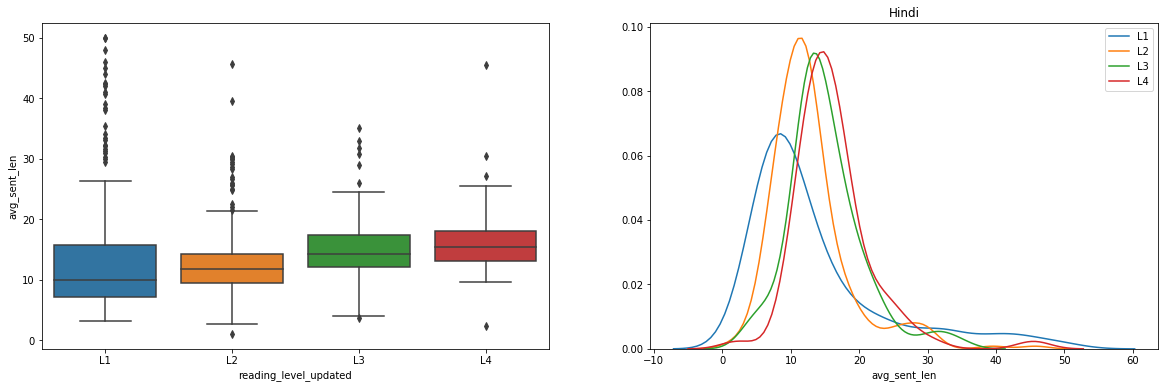

In [9]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 100
hist=False
border=50
sns.boxplot(x="reading_level_updated", y="avg_sent_len", data=hindi[hindi.avg_sent_len<=50],ax=ax[0])
sns.distplot(hindi[hindi.avg_sent_len<=border][hindi.reading_level_updated=='L1']['avg_sent_len'],bins,hist,label='L1',ax=ax[1])
sns.distplot(hindi[hindi.avg_sent_len<=border][hindi.reading_level_updated=='L2']['avg_sent_len'], bins,hist,label='L2',ax=ax[1])
sns.distplot(hindi[hindi.avg_sent_len<=border][hindi.reading_level_updated=='L3']['avg_sent_len'], bins,hist,label='L3',ax=ax[1])
sns.distplot(hindi[hindi.avg_sent_len<=border][hindi.reading_level_updated=='L4']['avg_sent_len'], bins,hist,label='L4',ax=ax[1])
plt.title('Hindi');

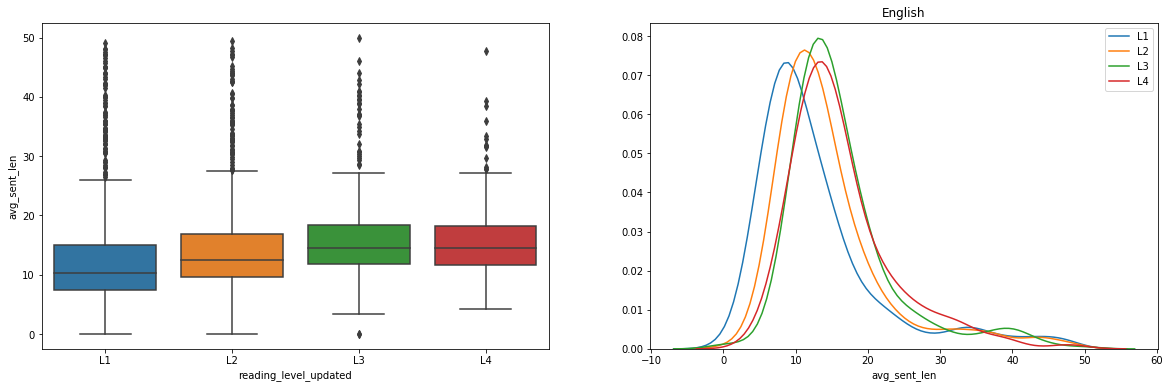

In [10]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 100
hist=False
border=50
sns.boxplot(x="reading_level_updated", y="avg_sent_len", data=english[english.avg_sent_len<=50],ax=ax[0])
sns.distplot(english[english.avg_sent_len<=border][english.reading_level_updated=='L1']['avg_sent_len'],bins,hist,label='L1',ax=ax[1])
sns.distplot(english[english.avg_sent_len<=border][english.reading_level_updated=='L2']['avg_sent_len'], bins,hist,label='L2',ax=ax[1])
sns.distplot(english[english.avg_sent_len<=border][english.reading_level_updated=='L3']['avg_sent_len'], bins,hist,label='L3',ax=ax[1])
sns.distplot(english[english.avg_sent_len<=border][english.reading_level_updated=='L4']['avg_sent_len'], bins,hist,label='L4',ax=ax[1])
plt.title('English');

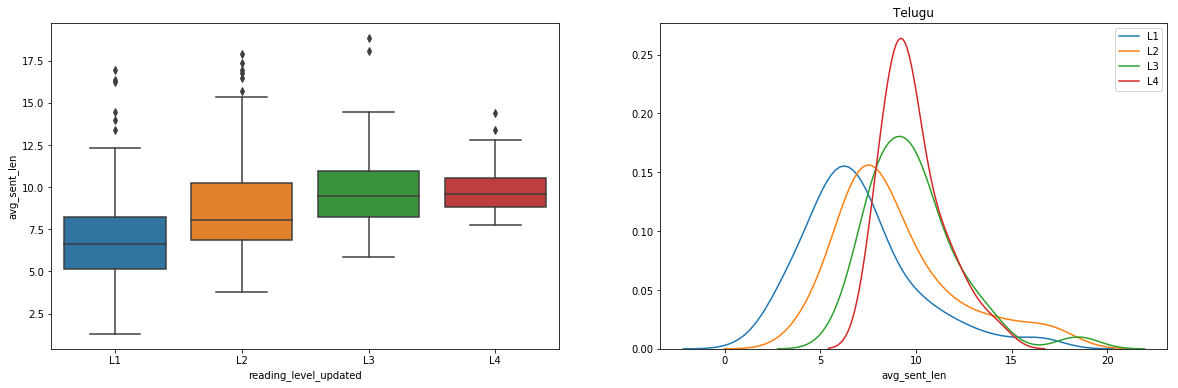

In [11]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 100
hist=False
border=20
sns.boxplot(x="reading_level_updated", y="avg_sent_len", order=['L1','L2','L3','L4'],data=telugu[telugu.avg_sent_len<=20],ax=ax[0])
sns.distplot(telugu[telugu.avg_sent_len<=border][telugu.reading_level_updated=='L1']['avg_sent_len'],bins,hist,label='L1',ax=ax[1])
sns.distplot(telugu[telugu.avg_sent_len<=border][telugu.reading_level_updated=='L2']['avg_sent_len'], bins,hist,label='L2',ax=ax[1])
sns.distplot(telugu[telugu.avg_sent_len<=border][telugu.reading_level_updated=='L3']['avg_sent_len'], bins,hist,label='L3',ax=ax[1])
sns.distplot(telugu[telugu.avg_sent_len<=border][telugu.reading_level_updated=='L4']['avg_sent_len'], bins,hist,label='L4',ax=ax[1])
plt.title('Telugu');

# 2. Unique words/Total Words

This decreases at an average rate of 14%, 13% and 9% in Hindi, English and Telugu respectively from L1 to L4.

This could be because elementary stories try to teach kids a lot of unique words through small stories.

In [12]:
def count_uniqe_words(x):
    count=0
    result = []
    [result.extend(el) for el in x] 
    result=set(result)
    for i in result:
        if (i not in string.punctuation) and (i!=u"।"):
            count=count+1
    return count

def count_all_words(x):
    count=0
    result = []
    [result.extend(el) for el in x]
    for i in result:
        if (i not in string.punctuation) and (i!=u"।"):
            count=count+1
    return count

def count_len_words(x):
    count=0
    result = []
    [result.extend(el) for el in x]
    for i in result:
        if (i not in string.punctuation) and (i!=u"।"):
            count=count+len(i)
    return count

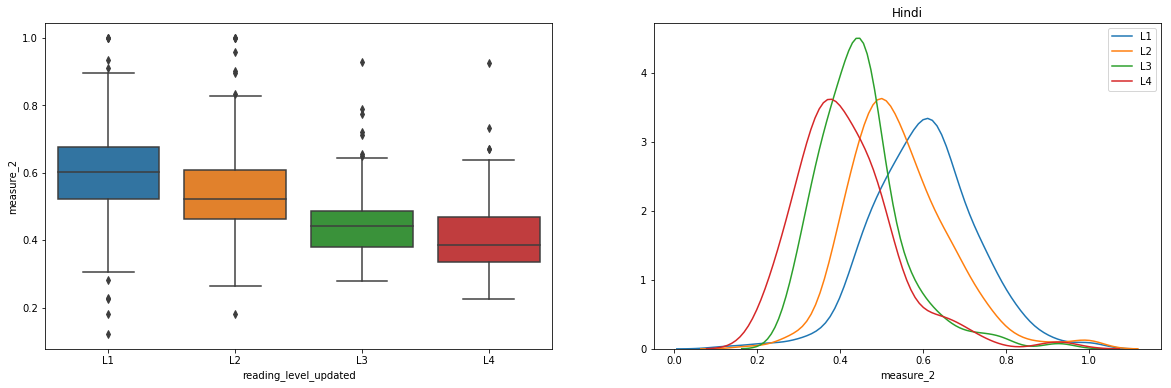

In [13]:
hindi['unique_words']=hindi.tok.apply(count_uniqe_words)
hindi['total_words']=hindi.tok.apply(count_all_words)
hindi['measure_2']=hindi['unique_words']/hindi['total_words']
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 1
hist=False
border=1
sns.boxplot(x="reading_level_updated", y="measure_2", data=hindi[hindi.measure_2<=10],ax=ax[0])
sns.distplot(hindi[hindi.measure_2<=border][hindi.reading_level_updated=='L1']['measure_2'],bins,hist,label='L1',ax=ax[1])
sns.distplot(hindi[hindi.measure_2<=border][hindi.reading_level_updated=='L2']['measure_2'], bins,hist,label='L2',ax=ax[1])
sns.distplot(hindi[hindi.measure_2<=border][hindi.reading_level_updated=='L3']['measure_2'], bins,hist,label='L3',ax=ax[1])
sns.distplot(hindi[hindi.measure_2<=border][hindi.reading_level_updated=='L4']['measure_2'], bins,hist,label='L4',ax=ax[1])
plt.title('Hindi');

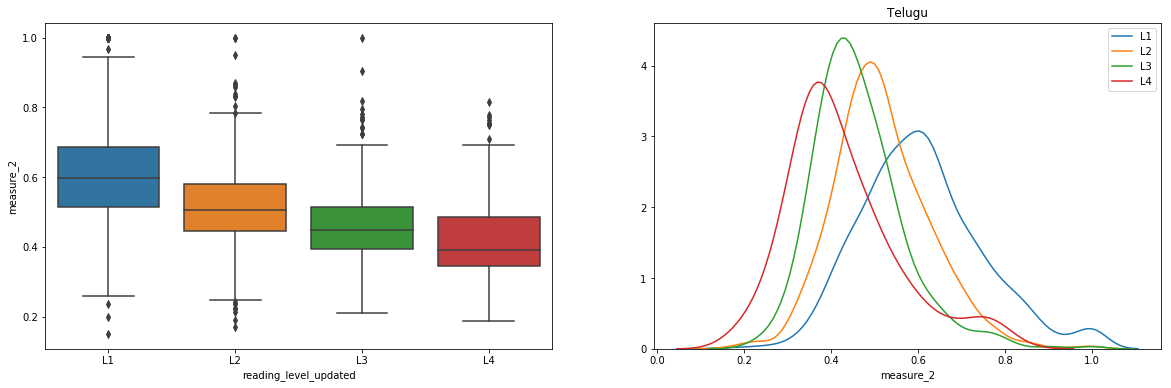

In [14]:
english['unique_words']=english.tok.apply(count_uniqe_words)
english['total_words']=english.tok.apply(count_all_words)
english['measure_2']=english['unique_words']/english['total_words']

fig, ax =plt.subplots(1,2,figsize=(20,6))

bins = 1
hist=False
border=1
sns.boxplot(x="reading_level_updated", y="measure_2", data=english[english.measure_2<=10],ax=ax[0])
sns.distplot(english[english.measure_2<=border][english.reading_level_updated=='L1']['measure_2'],bins,hist,label='L1',ax=ax[1])
sns.distplot(english[english.measure_2<=border][english.reading_level_updated=='L2']['measure_2'], bins,hist,label='L2',ax=ax[1])
sns.distplot(english[english.measure_2<=border][english.reading_level_updated=='L3']['measure_2'], bins,hist,label='L3',ax=ax[1])
sns.distplot(english[english.measure_2<=border][english.reading_level_updated=='L4']['measure_2'], bins,hist,label='L4',ax=ax[1])
plt.title('Telugu');

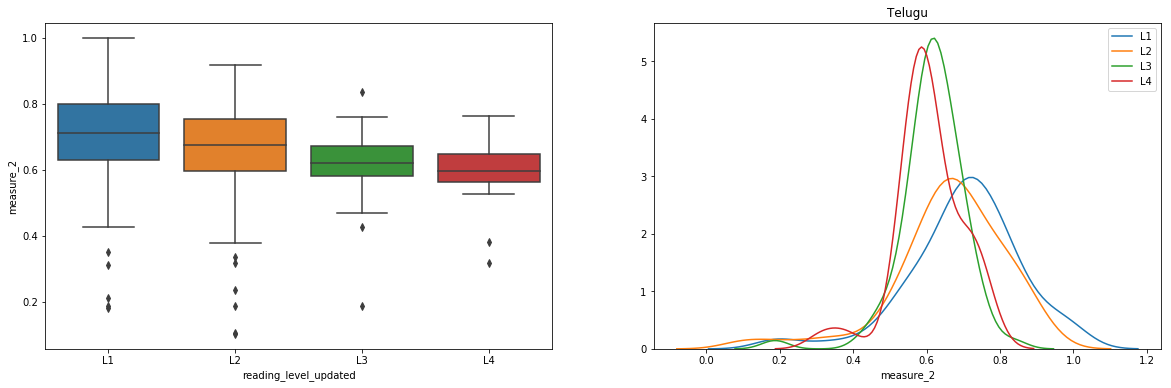

In [15]:
telugu['unique_words']=telugu.tok.apply(count_uniqe_words)
telugu['total_words']=telugu.tok.apply(count_all_words)
telugu['measure_2']=telugu['unique_words']/telugu['total_words']

fig, ax =plt.subplots(1,2,figsize=(20,6))

bins = 1
hist=False
border=1
sns.boxplot(x="reading_level_updated", y="measure_2", order=['L1','L2','L3','L4'],data=telugu[telugu.measure_2<=10],ax=ax[0])
sns.distplot(telugu[telugu.measure_2<=border][telugu.reading_level_updated=='L1']['measure_2'],bins,hist,label='L1',ax=ax[1])
sns.distplot(telugu[telugu.measure_2<=border][telugu.reading_level_updated=='L2']['measure_2'], bins,hist,label='L2',ax=ax[1])
sns.distplot(telugu[telugu.measure_2<=border][telugu.reading_level_updated=='L3']['measure_2'], bins,hist,label='L3',ax=ax[1])
sns.distplot(telugu[telugu.measure_2<=border][telugu.reading_level_updated=='L4']['measure_2'], bins,hist,label='L4',ax=ax[1])
plt.title('Telugu');

In [16]:
border=50
print('Hindi : ',hindi[hindi.measure_2<=border].groupby('reading_level_updated')['measure_2'].median().pct_change().mean()*100)
border=50
print('English : ',english[english.measure_2<=border].groupby('reading_level_updated')['measure_2'].median().pct_change().mean()*100)
border=50
print('Telugu : ',telugu[telugu.measure_2<=border].groupby('reading_level_updated')['measure_2'].median().pct_change().mean()*100)

Hindi :  -13.948852570157126
English :  -13.029355052023195
Telugu :  -5.700929428763949


# 3. Average Word length 

The average length of words used in Hindi, English and Telugu are increasing at a average rate of 1.4% ,1.3% and 1.5% respectively.
This suggests that new larger words are being added gradually to increase the vocabulary of students.
We will go deeper into this in the next section.

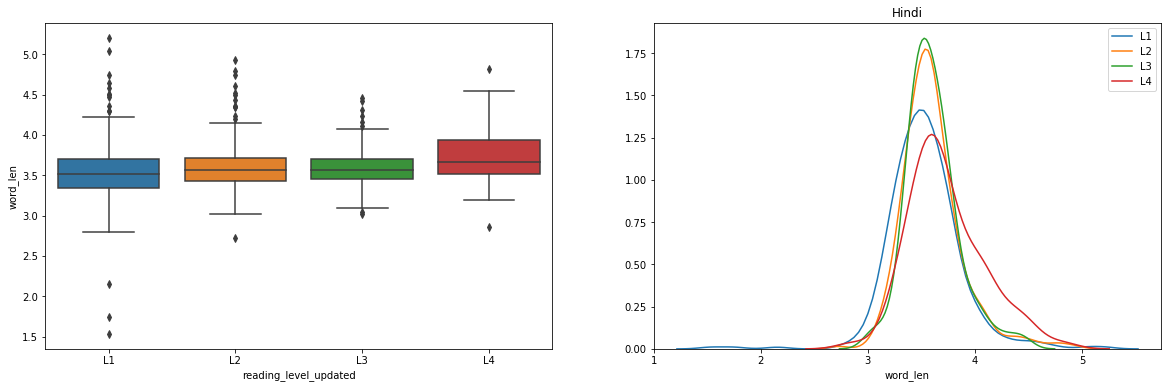

In [21]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
hindi['word_len']=hindi.tok.apply(count_len_words)/hindi['total_words']
bins = 1
hist=False
border=6
sns.boxplot(x="reading_level_updated", y="word_len", data=hindi[hindi.word_len<=border],ax=ax[0])
sns.distplot(hindi[hindi.word_len<=border][hindi.reading_level_updated=='L1']['word_len'],bins,hist,label='L1',ax=ax[1])
sns.distplot(hindi[hindi.word_len<=border][hindi.reading_level_updated=='L2']['word_len'], bins,hist,label='L2',ax=ax[1])
sns.distplot(hindi[hindi.word_len<=border][hindi.reading_level_updated=='L3']['word_len'], bins,hist,label='L3',ax=ax[1])
sns.distplot(hindi[hindi.word_len<=border][hindi.reading_level_updated=='L4']['word_len'], bins,hist,label='L4',ax=ax[1])
plt.title('Hindi');

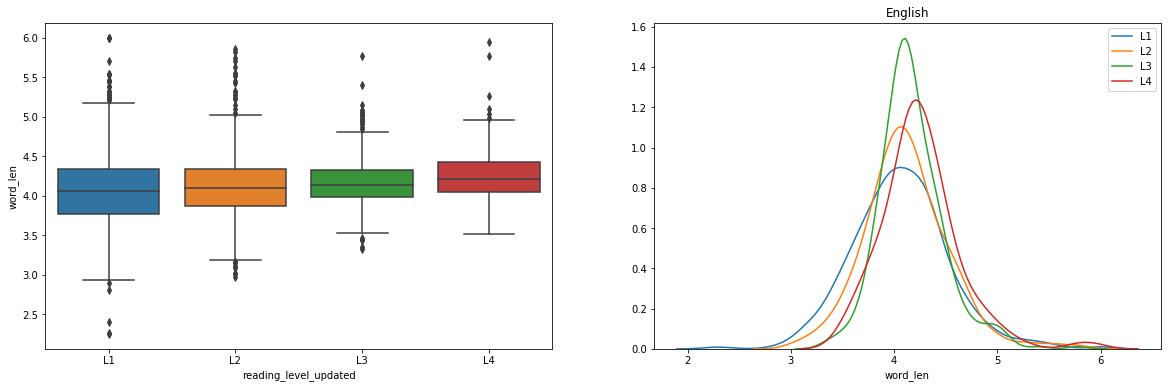

In [22]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
english['word_len']=english.tok.apply(count_len_words)/english['total_words']
bins = 1
hist=False
border=6
sns.boxplot(x="reading_level_updated", y="word_len", data=english[english.word_len<=border],ax=ax[0])
sns.distplot(english[english.word_len<=border][english.reading_level_updated=='L1']['word_len'],bins,hist,label='L1',ax=ax[1])
sns.distplot(english[english.word_len<=border][english.reading_level_updated=='L2']['word_len'], bins,hist,label='L2',ax=ax[1])
sns.distplot(english[english.word_len<=border][english.reading_level_updated=='L3']['word_len'], bins,hist,label='L3',ax=ax[1])
sns.distplot(english[english.word_len<=border][english.reading_level_updated=='L4']['word_len'], bins,hist,label='L4',ax=ax[1])
plt.title('English');

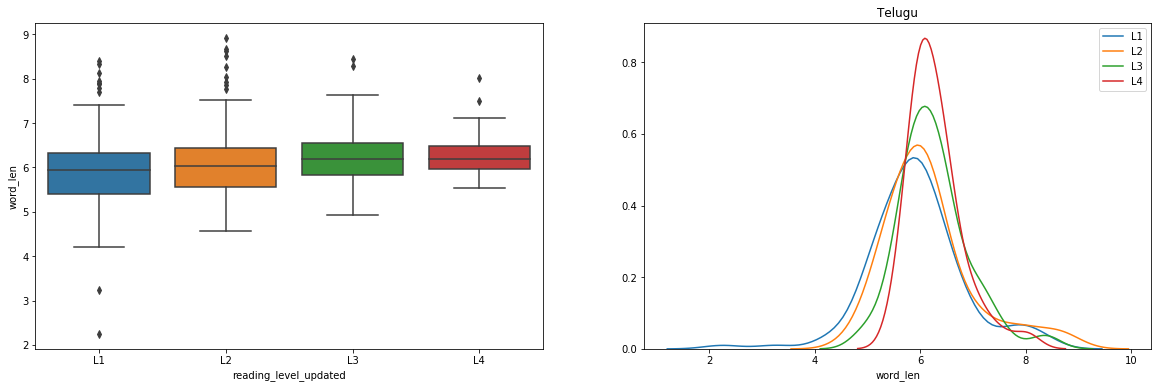

In [23]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
telugu['word_len']=telugu.tok.apply(count_len_words)/telugu['total_words']
bins = 1
hist=False
border=10
sns.boxplot(x="reading_level_updated", y="word_len", order=['L1','L2','L3','L4'], data=telugu[telugu.word_len<=10],ax=ax[0])
sns.distplot(telugu[telugu.word_len<=border][telugu.reading_level_updated=='L1']['word_len'],bins,hist,label='L1',ax=ax[1])
sns.distplot(telugu[telugu.word_len<=border][telugu.reading_level_updated=='L2']['word_len'], bins,hist,label='L2',ax=ax[1])
sns.distplot(telugu[telugu.word_len<=border][telugu.reading_level_updated=='L3']['word_len'], bins,hist,label='L3',ax=ax[1])
sns.distplot(telugu[telugu.word_len<=border][telugu.reading_level_updated=='L4']['word_len'], bins,hist,label='L4',ax=ax[1])
plt.title('Telugu');


In [24]:
border=50
print('Hindi : ',hindi[hindi.word_len<=border].groupby('reading_level_updated')['word_len'].median().pct_change().mean()*100)
border=50
print('English : ',english[english.word_len<=border].groupby('reading_level_updated')['word_len'].median().pct_change().mean()*100)
border=50
print('Telugu : ',telugu[telugu.word_len<=border].groupby('reading_level_updated')['word_len'].median().pct_change().mean()*100)

Hindi :  1.3996033105752925
English :  1.2664919604414848
Telugu :  1.4749629540531903


# 4. Complex Words/Total Words

The previous section pointed out that complex or larger words were being added into the vocabulary from L1 to L4.
In this section we define complex words in each language in the following way using histograms of average word length for Hindi and Telugu, and syllables for english.

* A complex word in hindi is a word whose length is greater than 7.
* A complex word in english is a word with atleast 3 Syllables.
* A complex word in telugu is a word whose length is greater than 11.

The percentage of complex words is increasing at a rate of 32% , 17% and 16% in hindi, english and telugu respectively.

Although lower levels have more unique words the higher levels have more complex words.

In [25]:
def extend_list(x):
    result = []
    [result.extend(el) for el in x]
    return result

def count_complex_words(x,complex_words):
    count=0
    result = []
    [result.extend(el) for el in x]
    for i in result:
        if (i in complex_words):
            count=count+1
    return count

In [26]:
cv_hindi=cv(tokenizer=lambda x: extend_list(x),lowercase=False,min_df=2)
hindi_vector=cv_hindi.fit_transform(hindi.tok)
hindi_vocab=pd.DataFrame()
hindi_vocab['words']=cv_hindi.get_feature_names()
hindi_vocab['count']=np.array(hindi_vector.sum(axis=0))[0]
hindi_vocab['word_len']=hindi_vocab.words.apply(len)
hindi_vocab=hindi_vocab[hindi_vocab.word_len>1]
#hindi_vocab.word_len.hist(bins=100)
complex_words_hindi=list(hindi_vocab[hindi_vocab.word_len>=7]['words'])
hindi['complex_words']=hindi.tok.apply(lambda x: count_complex_words(x,complex_words_hindi))
hindi['measure_4']=hindi['complex_words']/hindi['total_words']

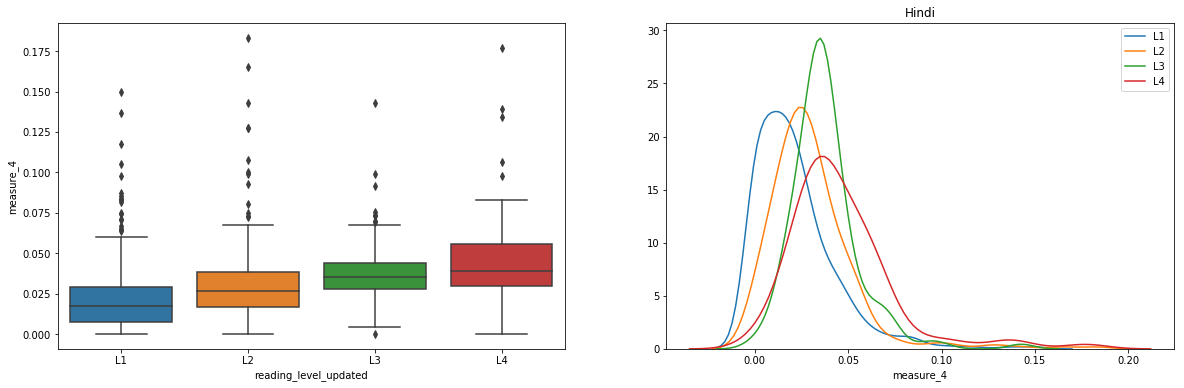

In [27]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 1
hist=False
border=6
sns.boxplot(x="reading_level_updated", y="measure_4", data=hindi[hindi.measure_4<=border],ax=ax[0])
sns.distplot(hindi[hindi.measure_4<=border][hindi.reading_level_updated=='L1']['measure_4'],bins,hist,label='L1',ax=ax[1])
sns.distplot(hindi[hindi.measure_4<=border][hindi.reading_level_updated=='L2']['measure_4'], bins,hist,label='L2',ax=ax[1])
sns.distplot(hindi[hindi.measure_4<=border][hindi.reading_level_updated=='L3']['measure_4'], bins,hist,label='L3',ax=ax[1])
sns.distplot(hindi[hindi.measure_4<=border][hindi.reading_level_updated=='L4']['measure_4'], bins,hist,label='L4',ax=ax[1])
plt.title('Hindi');

In [28]:
def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [29]:
cv_english=cv(tokenizer=lambda x: extend_list(x),lowercase=False,min_df=2)
english_vector=cv_english.fit_transform(english.tok)
english_vocab=pd.DataFrame()
english_vocab['words']=cv_english.get_feature_names()
english_vocab['count']=np.array(english_vector.sum(axis=0))[0]
english_vocab['syllable']=english_vocab.words.apply(syllable_count)
#english_vocab.syllable.hist(bins=100)
complex_words_english=list(english_vocab[english_vocab.syllable>=3]['words'])
english['complex_words']=english.tok.apply(lambda x: count_complex_words(x,complex_words_english))
english['measure_4']=english['complex_words']/english['total_words']

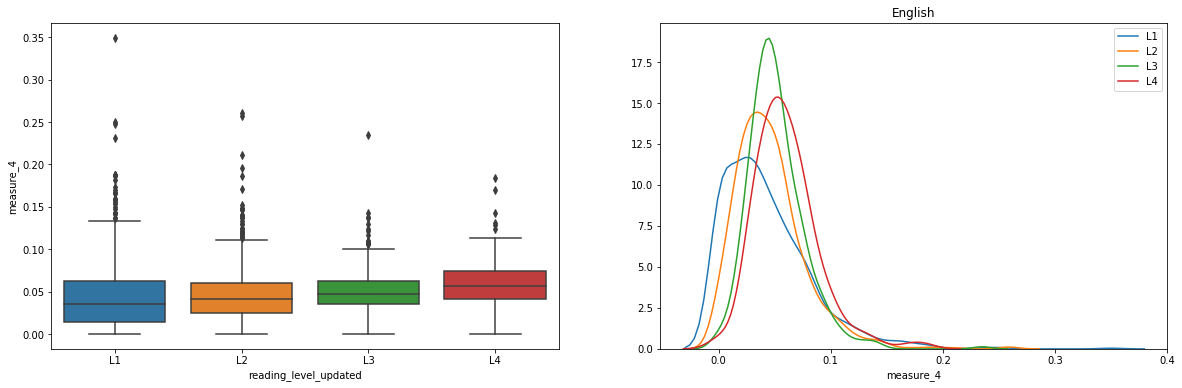

In [30]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 1
hist=False
border=10
sns.boxplot(x="reading_level_updated", y="measure_4", data=english[english.measure_4<=border],ax=ax[0])
sns.distplot(english[english.measure_4<=border][english.reading_level_updated=='L1']['measure_4'],bins,hist,label='L1',ax=ax[1])
sns.distplot(english[english.measure_4<=border][english.reading_level_updated=='L2']['measure_4'], bins,hist,label='L2',ax=ax[1])
sns.distplot(english[english.measure_4<=border][english.reading_level_updated=='L3']['measure_4'], bins,hist,label='L3',ax=ax[1])
sns.distplot(english[english.measure_4<=border][english.reading_level_updated=='L4']['measure_4'], bins,hist,label='L4',ax=ax[1])
plt.title('English');

In [31]:
cv_telugu=cv(tokenizer=lambda x: extend_list(x),lowercase=False,min_df=2)
telugu_vector=cv_telugu.fit_transform(telugu.tok)
telugu_vocab=pd.DataFrame()
telugu_vocab['words']=cv_telugu.get_feature_names()
telugu_vocab['count']=np.array(telugu_vector.sum(axis=0))[0]
telugu_vocab['word_len']=telugu_vocab.words.apply(len)
telugu_vocab=telugu_vocab[telugu_vocab.word_len>1]
#telugu_vocab.word_len.hist(bins=100)
complex_words_telugu=list(telugu_vocab[telugu_vocab.word_len>=11]['words'])
telugu['complex_words']=telugu.tok.apply(lambda x: count_complex_words(x,complex_words_telugu))
telugu['measure_4']=telugu['complex_words']/telugu['total_words']

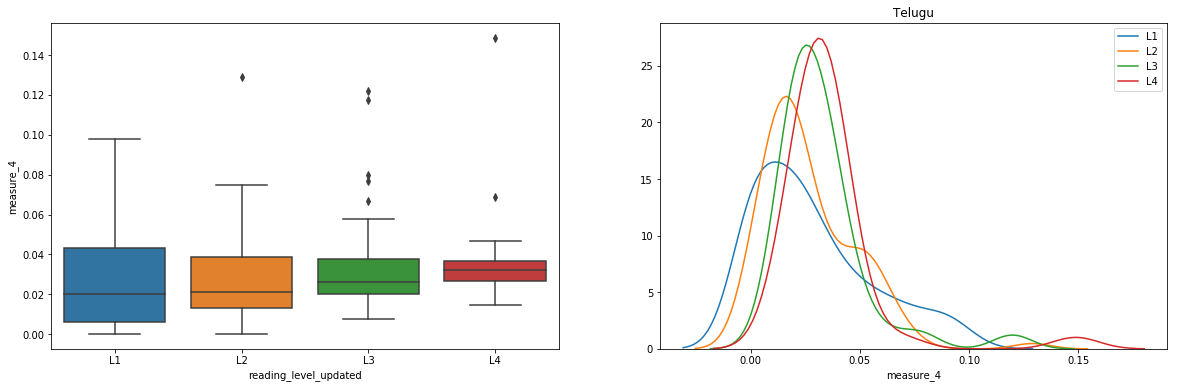

In [32]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 1
hist=False
border=0.2
sns.boxplot(x="reading_level_updated", y="measure_4",order=['L1','L2','L3','L4'] ,data=telugu[telugu.measure_4<=border],ax=ax[0])
sns.distplot(telugu[telugu.measure_4<=border][telugu.reading_level_updated=='L1']['measure_4'],bins,hist,label='L1',ax=ax[1])
sns.distplot(telugu[telugu.measure_4<=border][telugu.reading_level_updated=='L2']['measure_4'], bins,hist,label='L2',ax=ax[1])
sns.distplot(telugu[telugu.measure_4<=border][telugu.reading_level_updated=='L3']['measure_4'], bins,hist,label='L3',ax=ax[1])
sns.distplot(telugu[telugu.measure_4<=border][telugu.reading_level_updated=='L4']['measure_4'], bins,hist,label='L4',ax=ax[1])
plt.title('Telugu');

In [33]:
border=50
print('Hindi : ',hindi[hindi.measure_4<=border].groupby('reading_level_updated')['measure_4'].median().pct_change().mean()*100)
border=50
print('English : ',english[english.measure_4<=border].groupby('reading_level_updated')['measure_4'].median().pct_change().mean()*100)
border=50
print('Telugu : ',telugu[telugu.measure_4<=border].groupby('reading_level_updated')['measure_4'].median().pct_change().mean()*100)

Hindi :  32.52140492192404
English :  17.390356852012122
Telugu :  16.42132766361232


# 5. Gunning Fog Index

The Gunning fog index is a readability test for English writing (here we have extended it to hindi and telugu too). The index estimates the years of formal education a person needs to understand the text on the first reading.



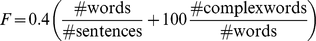



|  ---    | L1  | L2  | L3  | L4  |
|---------|-----|-----|-----|-----|
| Hindi   | 4.8 | 5.8 | 7.2 | 8   |
| English | 5.9 | 6.9 | 7.9 | 8.2 |
| Telugu  | 3.8 | 4.2 | 4.8 | 5   |


We can see that the readabilty level is increasing at a rate of 6%,10% and 8% for hindi, english and telugu respectively.

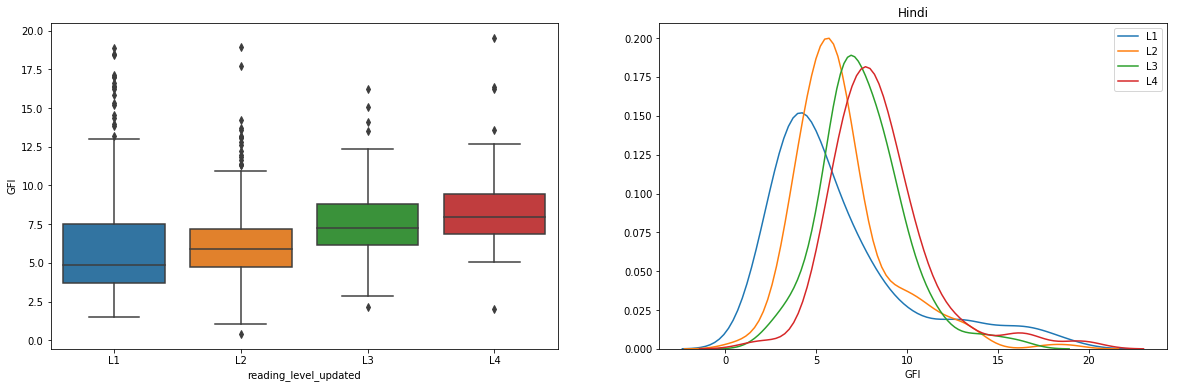

In [34]:
hindi['n_sentences']=hindi.tok.apply(len)
hindi['GFI']=0.4*((hindi.total_words/hindi.n_sentences)+100*(hindi.complex_words/hindi.total_words))
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 1
hist=False
border=20
sns.boxplot(x="reading_level_updated", y="GFI", data=hindi[hindi.GFI<=border],ax=ax[0])
sns.distplot(hindi[hindi.GFI<=border][hindi.reading_level_updated=='L1']['GFI'],bins,hist,label='L1',ax=ax[1])
sns.distplot(hindi[hindi.GFI<=border][hindi.reading_level_updated=='L2']['GFI'], bins,hist,label='L2',ax=ax[1])
sns.distplot(hindi[hindi.GFI<=border][hindi.reading_level_updated=='L3']['GFI'], bins,hist,label='L3',ax=ax[1])
sns.distplot(hindi[hindi.GFI<=border][hindi.reading_level_updated=='L4']['GFI'], bins,hist,label='L4',ax=ax[1])
plt.title('Hindi');

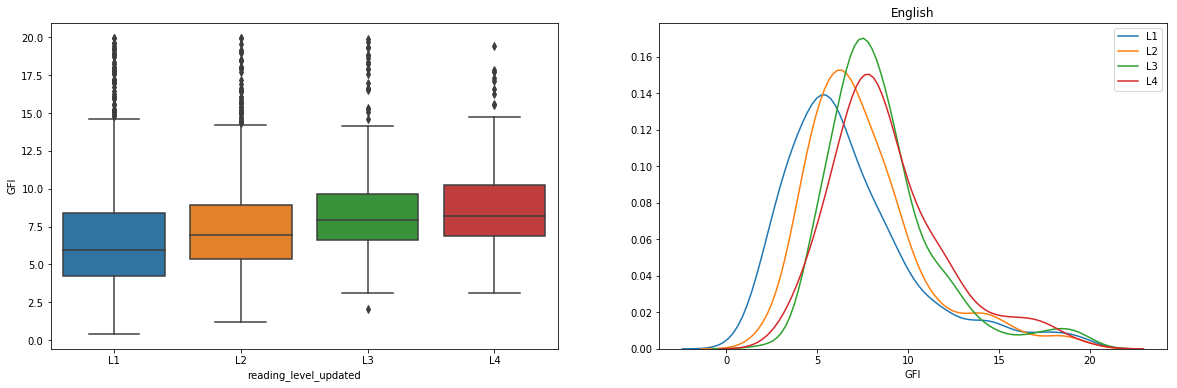

In [35]:
english['n_sentences']=english.tok.apply(len)
english['GFI']=0.4*((english.total_words/english.n_sentences)+100*(english.complex_words/english.total_words))
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 1
hist=False
border=20
sns.boxplot(x="reading_level_updated", y="GFI", data=english[english.GFI<=border],ax=ax[0])
sns.distplot(english[english.GFI<=border][english.reading_level_updated=='L1']['GFI'],bins,hist,label='L1',ax=ax[1])
sns.distplot(english[english.GFI<=border][english.reading_level_updated=='L2']['GFI'], bins,hist,label='L2',ax=ax[1])
sns.distplot(english[english.GFI<=border][english.reading_level_updated=='L3']['GFI'], bins,hist,label='L3',ax=ax[1])
sns.distplot(english[english.GFI<=border][english.reading_level_updated=='L4']['GFI'], bins,hist,label='L4',ax=ax[1])
plt.title('English');

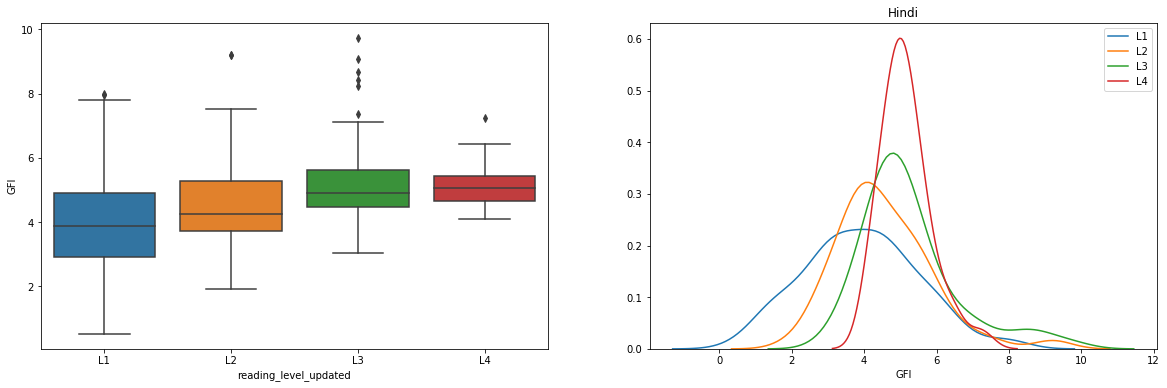

In [36]:
telugu['n_sentences']=telugu.tok.apply(len)
telugu['GFI']=0.4*((telugu.total_words/telugu.n_sentences)+100*(telugu.complex_words/telugu.total_words))
fig, ax =plt.subplots(1,2,figsize=(20,6))
bins = 1
hist=False
border=10
sns.boxplot(x="reading_level_updated", y="GFI",order=['L1','L2','L3','L4'], data=telugu[telugu.GFI<=border],ax=ax[0])
sns.distplot(telugu[telugu.GFI<=border][telugu.reading_level_updated=='L1']['GFI'],bins,hist,label='L1',ax=ax[1])
sns.distplot(telugu[telugu.GFI<=border][telugu.reading_level_updated=='L2']['GFI'], bins,hist,label='L2',ax=ax[1])
sns.distplot(telugu[telugu.GFI<=border][telugu.reading_level_updated=='L3']['GFI'], bins,hist,label='L3',ax=ax[1])
sns.distplot(telugu[telugu.GFI<=border][telugu.reading_level_updated=='L4']['GFI'], bins,hist,label='L4',ax=ax[1])
plt.title('Hindi');

In [37]:
border=50
print('Hindi : ',hindi[hindi.GFI<=border].groupby('reading_level_updated')['GFI'].median().pct_change().mean()*100)
border=50
print('English : ',english[english.GFI<=border].groupby('reading_level_updated')['GFI'].median().pct_change().mean()*100)
border=50
print('Telugu : ',telugu[telugu.GFI<=border].groupby('reading_level_updated')['GFI'].median().pct_change().mean()*100)

Hindi :  5.920603852054481
English :  10.255856751937188
Telugu :  8.231961408636794


# POS TAGs

POS for englsih have been produced using nltk pos tagger.

POS for hindi and telugu are produced using models in the following open source projects.

Hindi:
https://bitbucket.org/sivareddyg/hindi-part-of-speech-tagger
Telugu:
https://bitbucket.org/sivareddyg/telugu-part-of-speech-tagger

In [38]:
def clean_non_english(x):
    x=x.replace('&nbsp;','')
    x=x.translate(x.maketrans('', '',string.ascii_letters+string.digits+'/'))
    return x

def parse_pos(t):
    l=[]
    temp=[]
    for i in t.text.split('\n'):
        if len(i)>1:
            temp.append(i.split('\t')[2])
        else:
            l.append(temp)
            temp=[]
    l=list(filter(lambda x: len(x)>1,l))
    return l

def english_pos(x):
    l=nltk.pos_tag_sents(x)
    l=list(map(lambda x: list(map(lambda y: 'SYM' if y[1] in string.punctuation else y[1] ,x)),l))
    return l

In [39]:
# s=''
# for i,txt in enumerate(hindi.content.apply(clean_non_english)):
#     s=s+"<doc>"+txt+"</doc>"
# hindi_file = open("hindi_file.txt", "w")
# hindi_file.write(s)
# hindi_file.close()
# s=''
# for i,txt in enumerate(telugu.content.apply(clean_non_english)):
#     s=s+"<doc>"+txt+"</doc>"
# telugu_file = open("telugu_file.txt", "w")
# telugu_file.write(s)
# telugu_file.close()

file = open('hindi.output')
hindi_pos=bs(file.read())
hindi['pos_full']=hindi_pos.find_all(name='doc')
hindi['pos']=hindi.pos_full.apply(parse_pos)

file = open('telugu.output')
telugu_pos=bs(file.read())
telugu['pos_full']=telugu_pos.find_all(name='doc')
telugu['pos']=telugu.pos_full.apply(parse_pos)

english['pos']=english.tok.apply(english_pos)

# POS Distribution

In [40]:
def pos_distribution(lang,level):
    a=[]
    b=[]
    for i,l in enumerate(lang.pos):
        a.extend(l)
        b.extend(len(l)*[lang.reading_level_updated.iloc[i]])
    lang_sent=pd.DataFrame()
    lang_sent['pos']=a
    lang_sent['reading_level_updated']=b
    cv_lang=cv(tokenizer=(lambda x: x),lowercase=False,min_df=2 , ngram_range=(1,1))
    lang_vector=cv_lang.fit_transform(lang_sent[lang_sent['reading_level_updated']==level]['pos'])
    lang_vocab=pd.DataFrame()
    lang_vocab['words']=cv_lang.get_feature_names()
    lang_vocab['count']=np.array(lang_vector.sum(axis=0))[0]
    lang_vocab['count']=lang_vocab['count']/lang_vocab['count'].sum()
    return lang_vocab

In [51]:
def usage_pos(lang,raw=False):
    a=[]
    b=[]
    for i,l in enumerate(lang.pos):
        a.extend(l)
        b.extend(len(l)*[lang.reading_level_updated.iloc[i]])
    lang_sent=pd.DataFrame()
    lang_sent['pos']=a
    lang_sent['reading_level_updated']=b
    cv_lang=cv(tokenizer=(lambda x: x),lowercase=False,min_df=2 , ngram_range=(1,1))
    lang_vector=cv_lang.fit_transform(lang_sent.pos)
    lang_vocab=pd.DataFrame()
    lang_vocab['words']=cv_lang.get_feature_names()
    lang_vocab['count']=np.array(lang_vector.sum(axis=0))[0]
    #lang_vocab=lang_vocab[lang_vocab.words.apply(lambda x: 'SYM' not in x)]
    lang_pos=pd.DataFrame(lang_vector.toarray(),columns=cv_lang.get_feature_names())
    lang_pos=lang_pos.applymap(lambda x: 1 if x>=1 else 0)
    #lang_pos=lang_pos[list(filter(lambda x:'SYM' not in x ,list(lang_pos.columns)))]
    lang_pos['reading_level_updated']=list(lang_sent['reading_level_updated'])
    a=(lang_pos.groupby('reading_level_updated').mean()*100).T.reset_index()
    a['order']=a[['L1','L2','L3','L4']].apply(lambda x:x.sort_values().reset_index()['reading_level_updated'].str.cat(sep='_'),axis=1)
    if not raw:
        a=a['order'].value_counts()
        a=100*(a/a.sum())
        return a[['L1_L2_L3_L4','L4_L3_L2_L1']].fillna(0)
    else:
        return a


There are small differences between the POS distributions of all levels in each language. We will analyse them in the next section.

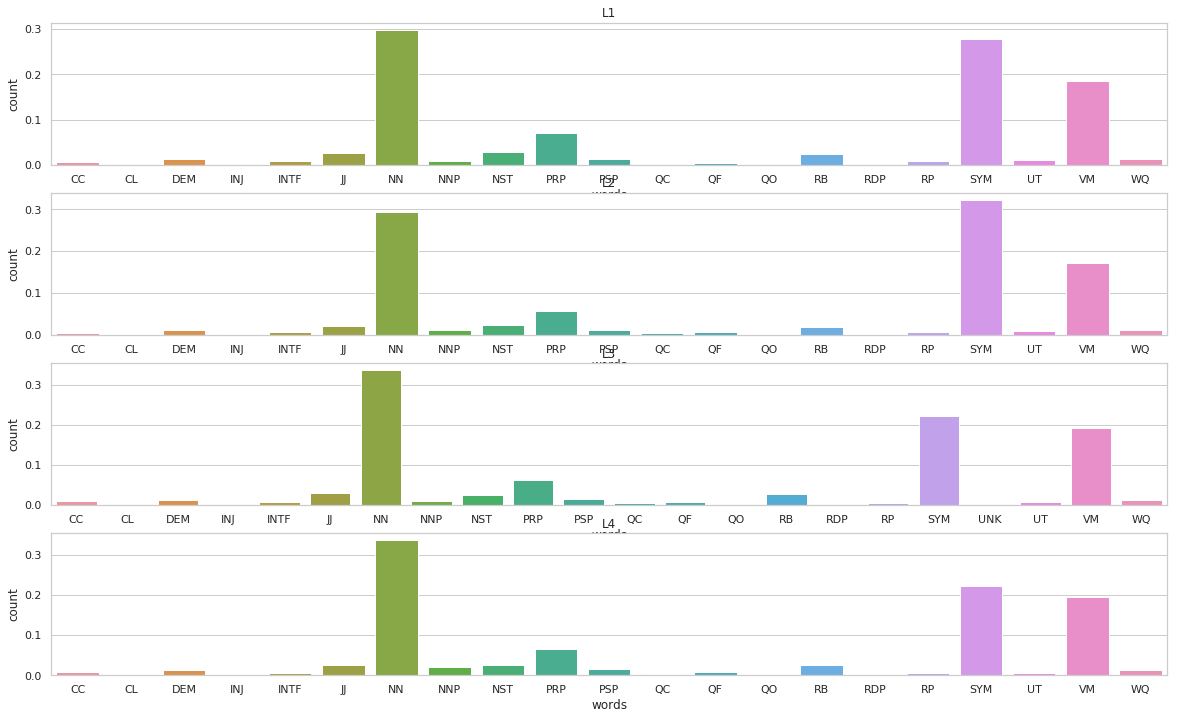

In [52]:
fig, ax =plt.subplots(4,1,figsize=(20,12))
sns.set(style="whitegrid")
ax[0].title.set_text('L1')
ax[1].title.set_text('L2')
ax[2].title.set_text('L3')
ax[3].title.set_text('L4')
sns.barplot(x='words',y='count',data=pos_distribution(telugu,'L1'),ax=ax[0])
sns.barplot(x='words',y='count',data=pos_distribution(telugu,'L2'),ax=ax[1])
sns.barplot(x='words',y='count',data=pos_distribution(telugu,'L3'),ax=ax[2])
sns.barplot(x='words',y='count',data=pos_distribution(telugu,'L4'),ax=ax[3])



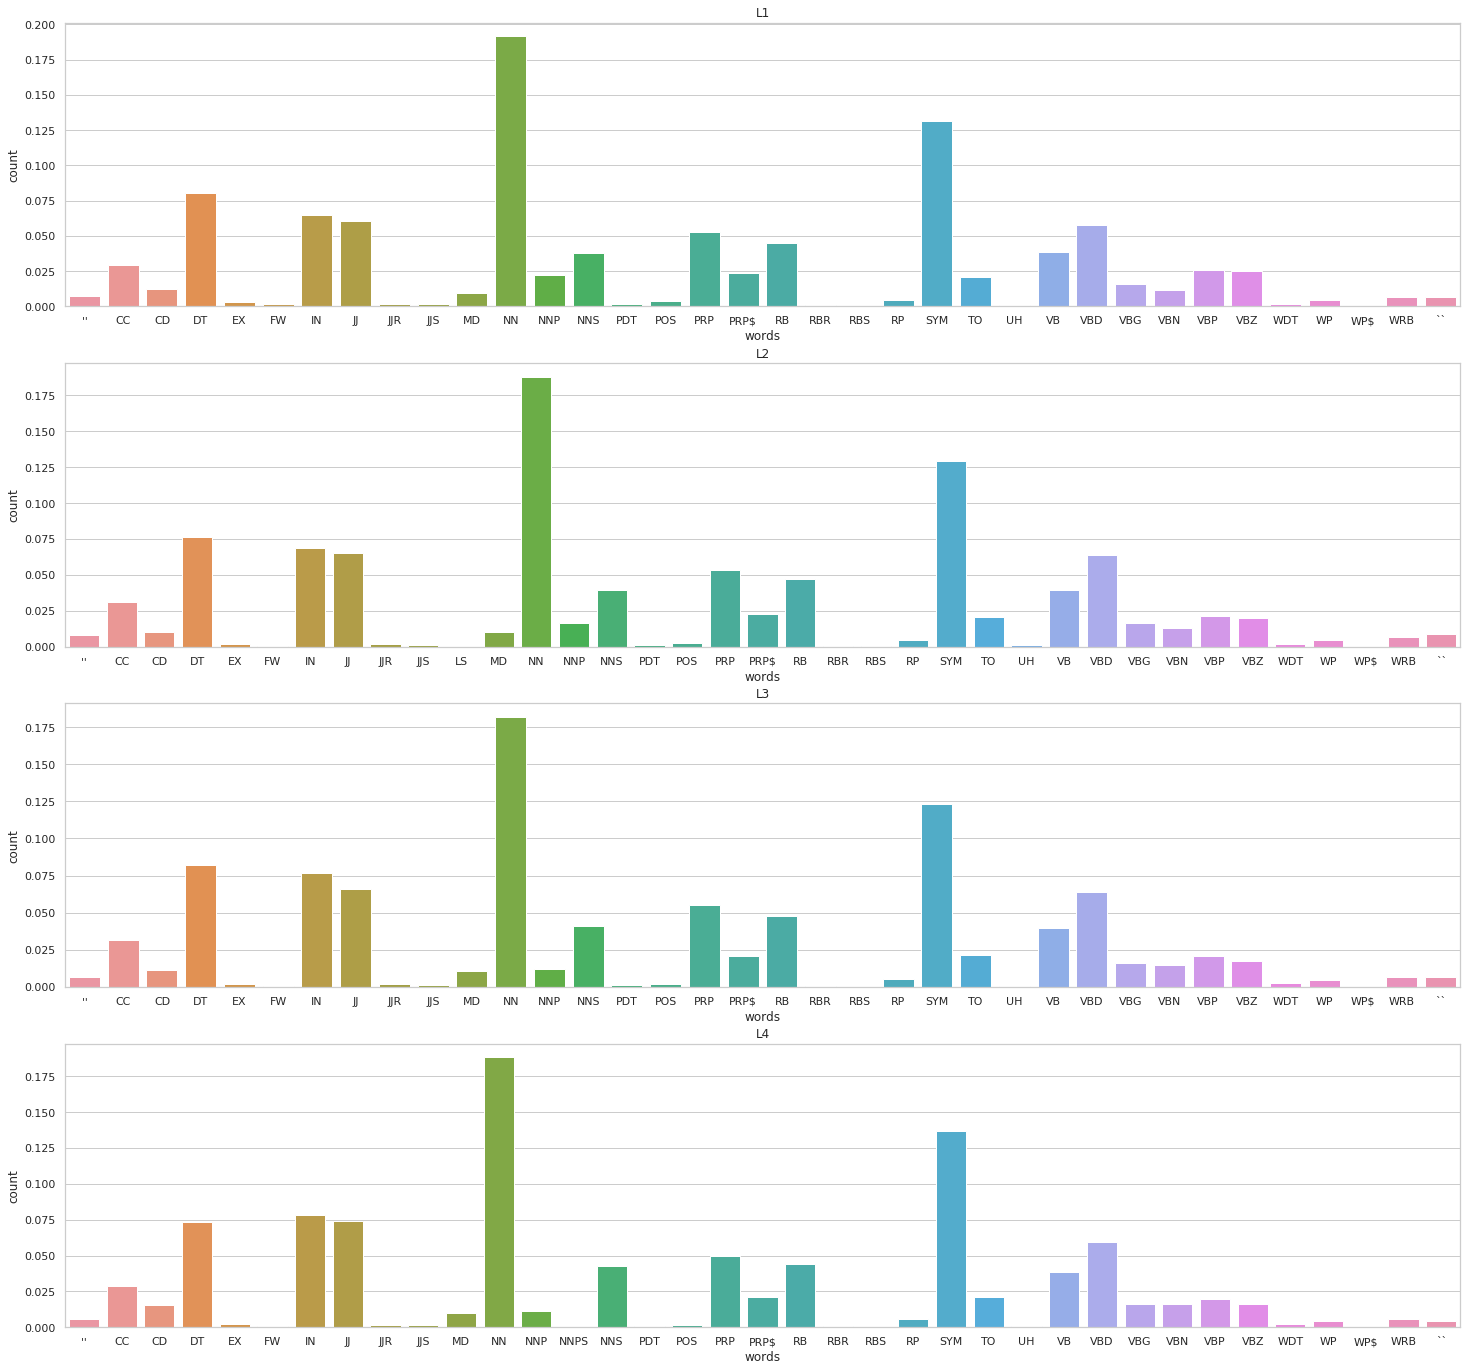

In [53]:

fig, ax =plt.subplots(4,1,figsize=(25,24))
sns.set(style="whitegrid")
ax[0].title.set_text('L1')
ax[1].title.set_text('L2')
ax[2].title.set_text('L3')
ax[3].title.set_text('L4')
sns.barplot(x='words',y='count',data=pos_distribution(english,'L1'),ax=ax[0])
sns.barplot(x='words',y='count',data=pos_distribution(english,'L2'),ax=ax[1])
sns.barplot(x='words',y='count',data=pos_distribution(english,'L3'),ax=ax[2])
sns.barplot(x='words',y='count',data=pos_distribution(english,'L4'),ax=ax[3])



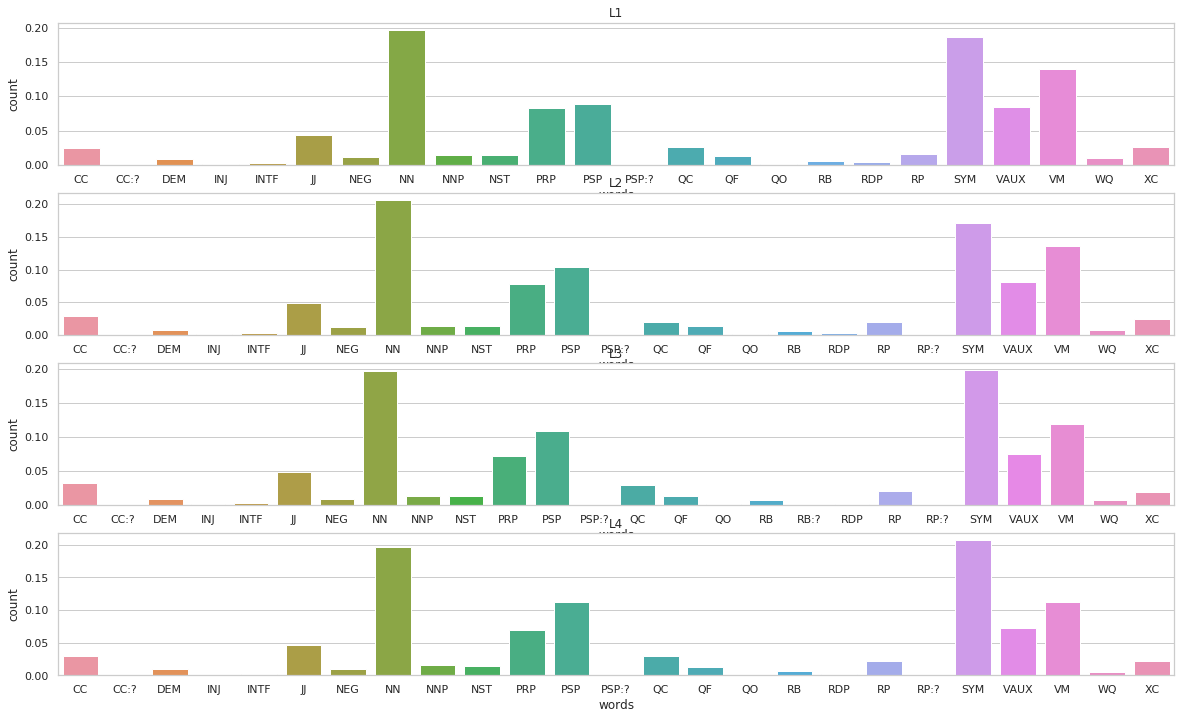

In [54]:
fig, ax =plt.subplots(4,1,figsize=(20,12))
sns.set(style="whitegrid")
ax[0].title.set_text('L1')
ax[1].title.set_text('L2')
ax[2].title.set_text('L3')
ax[3].title.set_text('L4')
sns.barplot(x='words',y='count',data=pos_distribution(hindi,'L1'),ax=ax[0])
sns.barplot(x='words',y='count',data=pos_distribution(hindi,'L2'),ax=ax[1])
sns.barplot(x='words',y='count',data=pos_distribution(hindi,'L3'),ax=ax[2])
sns.barplot(x='words',y='count',data=pos_distribution(hindi,'L4'),ax=ax[3])



## Percentage of POS tags whose usage is increasing in the order shown
We can see that the although the distributions the same the usage of most pos tags is increasing.

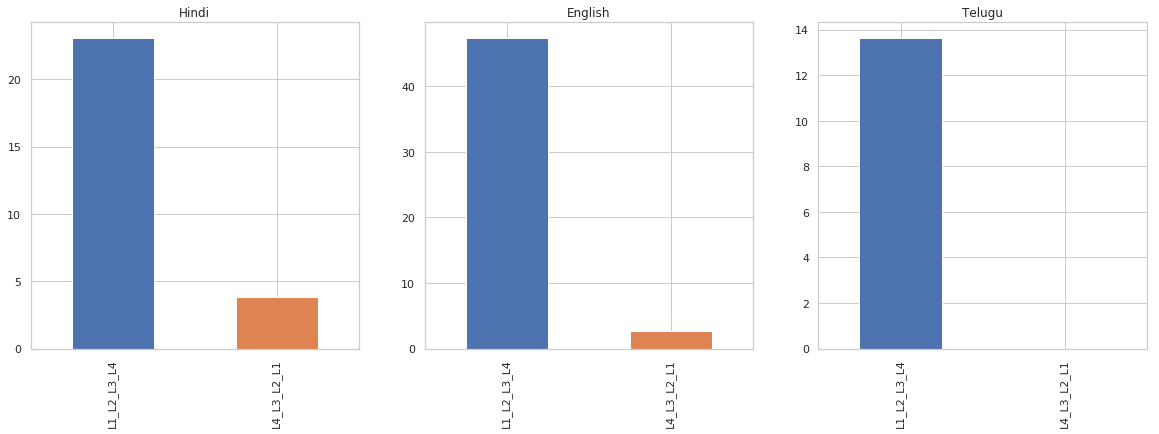

In [55]:
fig, ax =plt.subplots(1,3,figsize=(20,6))
sns.set(style="whitegrid")
ax[0].title.set_text('Hindi')
usage_pos(hindi).plot('bar',ax=ax[0])

ax[1].title.set_text('English')
usage_pos(english).plot('bar',ax=ax[1])

ax[2].title.set_text('Telugu')
usage_pos(telugu).plot('bar',ax=ax[2])

In hindi RDP i.e Reduplicatives are decreasing from L1 to L4.
Reduplication refers to words formed through repetition of sounds.

Example:

दीदी, दीदी, कभी-कभी मैं सोचता हूँ

In [88]:
a=usage_pos(hindi,True)
a[a['order']=='L4_L3_L2_L1']

reading_level_updated,index,L1,L2,L3,L4,order
18,RDP,4.129032,3.380158,2.808353,2.338773,L4_L3_L2_L1




In english POS i.e  possessive ending parent’s are decreasing from L1 to L4.

Example:
Tears flowed from the fawn's eyes

In [89]:
a=usage_pos(english,True)
a[a['order']=='L4_L3_L2_L1']

reading_level_updated,index,L1,L2,L3,L4,order
17,POS,4.169735,3.612285,3.092369,1.945029,L4_L3_L2_L1


# POS Sentences

In [99]:
def join_list(x):
    result=[]
    for i in x:
        result.append('_'.join(i))
    return result


def unique_pos_sen_ratio(lang,level):
    cv_m=cv(tokenizer=lambda x: join_list(x),lowercase=False,min_df=1)
    vector=cv_m.fit_transform(lang['pos'][lang.reading_level_updated==level])
    vocab=pd.DataFrame()
    vocab['words']=cv_m.get_feature_names()
    vocab['count']=np.array(vector.sum(axis=0))[0]
    vocab=vocab[vocab.words.apply(lambda x: x.split('_')[0]!='SYM')]
    return vocab.shape[0]/vocab['count'].sum()

def pos_sen_usage(lang,raw=False):
    cv_m=cv(tokenizer=lambda x: join_list(x),lowercase=False,min_df=2)
    vector=cv_m.fit_transform(lang['pos'])
    pos=pd.DataFrame(vector.toarray(),columns=cv_m.get_feature_names())
    pos=pos.applymap(lambda x: 1 if x>=1 else 0)
    pos=pos[list(filter(lambda x: x.split('_')[0]!='SYM' ,list(pos.columns)))]
    r=list(lang.reset_index()[pos.apply(lambda x: x.sum()>0 ,axis=1)]['reading_level_updated'])
    pos=pos[pos.apply(lambda x: x.sum()>0 ,axis=1)]
    pos['reading_level_updated']=r
    a=(pos.groupby('reading_level_updated').mean()*100).T.reset_index()
    a['order']=a[['L1','L2','L3','L4']].apply(lambda x:x.sort_values().reset_index()['reading_level_updated'].str.cat(sep='_'),axis=1)
    if not raw:
        a=a['order'].value_counts()
        a=100*(a/a.sum())
        return a[['L1_L2_L3_L4','L4_L3_L2_L1']].fillna(0)
    else:
        return a


## Unique POS Sentences / Total Sentences 
We can see that the percentage of unique sentences is increasing from L1 to L4. 

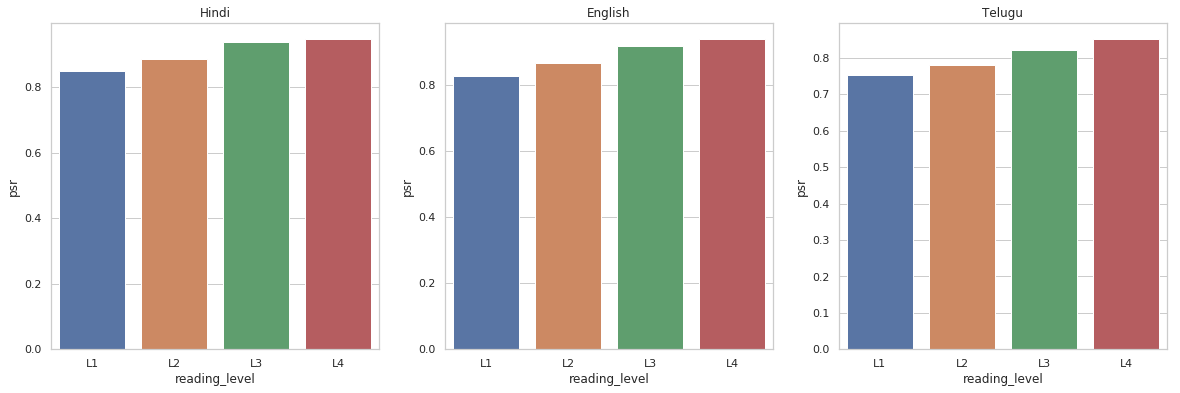

In [100]:
fig, ax =plt.subplots(1,3,figsize=(20,6))
hindi_psr=pd.DataFrame()
hindi_psr['reading_level']=['L1','L2','L3','L4']
hindi_psr['psr']=hindi_psr['reading_level'].apply(lambda x: unique_pos_sen_ratio(hindi,x))
hindi_psr
sns.set(style="whitegrid")
ax[0].title.set_text('Hindi')
sns.barplot(x="reading_level", y="psr", data=hindi_psr,ax=ax[0])


english_psr=pd.DataFrame()
english_psr['reading_level']=['L1','L2','L3','L4']
english_psr['psr']=english_psr['reading_level'].apply(lambda x: unique_pos_sen_ratio(english,x))
english_psr
sns.set(style="whitegrid")
ax[1].title.set_text('English')
sns.barplot(x="reading_level", y="psr", data=english_psr,ax=ax[1])

telugu_psr=pd.DataFrame()
telugu_psr['reading_level']=['L1','L2','L3','L4']
telugu_psr['psr']=telugu_psr['reading_level'].apply(lambda x: unique_pos_sen_ratio(telugu,x))
telugu_psr
sns.set(style="whitegrid")
ax[2].title.set_text('Telugu')
sns.barplot(x="reading_level", y="psr", data=telugu_psr,ax=ax[2])

# Usage of POS sentences
Usage of most POS sentences are increasing from L1 to L4.

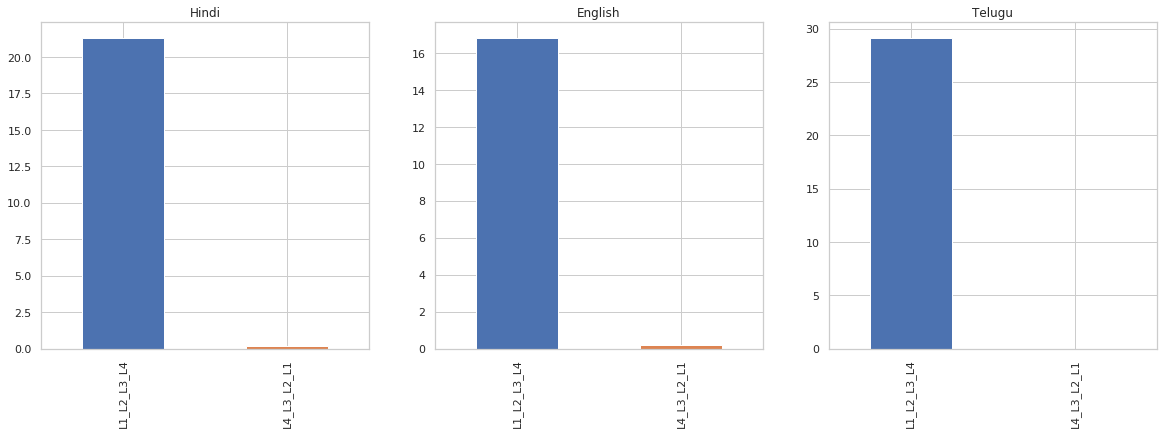

In [101]:
fig, ax =plt.subplots(1,3,figsize=(20,6))
sns.set(style="whitegrid")
ax[0].title.set_text('Hindi')
pos_sen_usage(hindi).plot('bar',ax=ax[0])

ax[1].title.set_text('English')
pos_sen_usage(english).plot('bar',ax=ax[1])

ax[2].title.set_text('Telugu')
pos_sen_usage(telugu).plot('bar',ax=ax[2])

Very Simple Sentences formed using the following combinations are decresing from L4 to L1

NN_QC_JJ_NN_VM_SYM  ---  साकूलैंड एक अनोखा देश था।

PRP_VM_VAUX_VAUX_SYM  ---      वह उड़ना चाहत था।



In [104]:
a=pos_sen_usage(hindi,True)
a[a['order']=='L4_L3_L2_L1']

reading_level_updated,index,L1,L2,L3,L4,order
402,NN_QC_JJ_NN_VM_SYM,1.209677,0.843882,0.806452,0.000000,L4_L3_L2_L1
807,PRP_VM_VAUX_VAUX_SYM,4.032258,2.953586,2.419355,1.298701,L4_L3_L2_L1


we see that same kind of trend in english in which very simple sentences are decreasing from L1 to L4

PRP_VBD_RB_JJ_CC_JJ_SYM ----- He was very big and fat.

In [105]:
a=pos_sen_usage(english,True)
a[a['order']=='L4_L3_L2_L1']

reading_level_updated,index,L1,L2,L3,L4,order
104,CD_NNS_CD_SYM,0.803859,0.484653,0.314465,0.0,L4_L3_L2_L1
810,NN_NN_NN_NN_SYM,0.643087,0.484653,0.314465,0.0,L4_L3_L2_L1
862,NN_POS_VB_SYM,0.643087,0.323102,0.314465,0.0,L4_L3_L2_L1
1451,PRP_VBD_RB_JJ_CC_JJ_SYM,0.482315,0.323102,0.314465,0.0,L4_L3_L2_L1


# POS Ngrams

The variety of POS Ngrams is an indication of forming a phrase in different ways
we can see that most of the ngrams are increasing from L1 to L4

In [146]:
def unique_pos_ngrams(lang,level,n_range=(5,6)):
    a=[]
    b=[]
    for i,l in enumerate(lang.pos):
        a.extend(l)
        b.extend(len(l)*[lang.reading_level_updated.iloc[i]])
    lang_sent=pd.DataFrame()
    lang_sent['pos']=a
    lang_sent['reading_level_updated']=b
    cv_lang=cv(tokenizer=(lambda x: x),lowercase=False,min_df=10 , ngram_range=n_range)
    lang_vector=cv_lang.fit_transform(lang_sent[lang_sent['reading_level_updated']==level].pos)
    lang_vocab=pd.DataFrame()
    lang_vocab['words']=cv_lang.get_feature_names()
    lang_vocab['count']=np.array(lang_vector.sum(axis=0))[0]
    lang_vocab=lang_vocab[lang_vocab.words.apply(lambda x: 'SYM' not in x)]
    return lang_vocab.shape[0]/lang_sent[lang_sent['reading_level_updated']==level].shape[0]

def usage_pos_ngrams(lang,n_range=(5,6),raw=False):
    a=[]
    b=[]
    for i,l in enumerate(lang.pos):
        a.extend(l)
        b.extend(len(l)*[lang.reading_level_updated.iloc[i]])
    lang_sent=pd.DataFrame()
    lang_sent['pos']=a
    lang_sent['reading_level_updated']=b
    cv_lang=cv(tokenizer=(lambda x: x),lowercase=False,min_df=10 , ngram_range=n_range)
    lang_vector=cv_lang.fit_transform(lang_sent.pos)
    lang_vocab=pd.DataFrame()
    lang_vocab['words']=cv_lang.get_feature_names()
    lang_vocab['count']=np.array(lang_vector.sum(axis=0))[0]
    lang_vocab=lang_vocab[lang_vocab.words.apply(lambda x: 'SYM' not in x)]
    lang_pos=pd.DataFrame(lang_vector.toarray(),columns=cv_lang.get_feature_names())
    lang_pos=lang_pos.applymap(lambda x: 1 if x>=1 else 0)
    lang_pos=lang_pos[list(filter(lambda x:'SYM' not in x ,list(lang_pos.columns)))]
    lang_pos['reading_level_updated']=list(lang_sent['reading_level_updated'])
    a=(lang_pos.groupby('reading_level_updated').mean()*100).T.reset_index()
    a['order']=a[['L1','L2','L3','L4']].apply(lambda x:x.sort_values().reset_index()['reading_level_updated'].str.cat(sep='_'),axis=1)
    if not raw:
        a=a['order'].value_counts()
        a=100*(a/a.sum())
        return a[['L1_L2_L3_L4','L4_L3_L2_L1']].fillna(0)
    else:
        return a

## Unique POS Ngrams / Total Sentences 
We can see that the percentage of POS Ngrams is increasing from L1 to L4. 

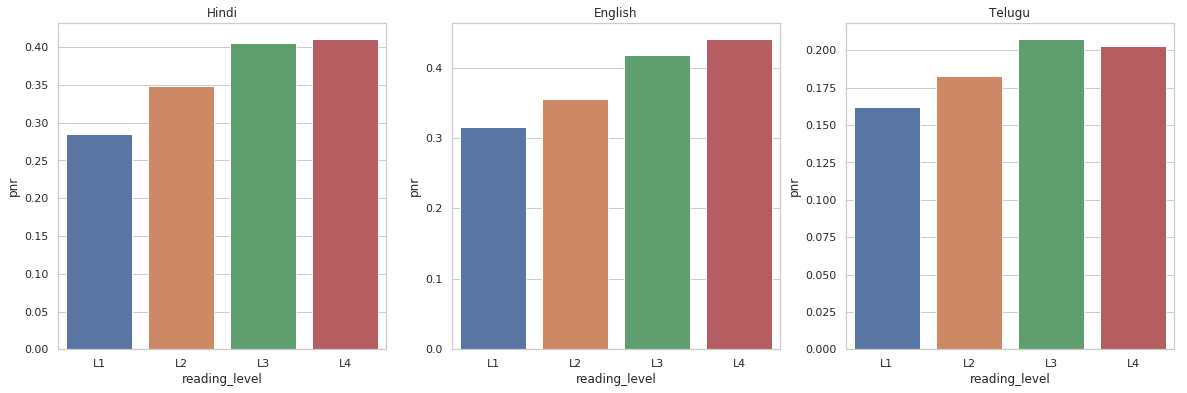

In [147]:
fig, ax =plt.subplots(1,3,figsize=(20,6))
hindi_pnr=pd.DataFrame()
hindi_pnr['reading_level']=['L1','L2','L3','L4']
hindi_pnr['pnr']=hindi_pnr['reading_level'].apply(lambda x: unique_pos_ngrams(hindi,x,(3,6)))
sns.set(style="whitegrid")
ax[0].title.set_text('Hindi')
sns.barplot(x="reading_level", y="pnr", data=hindi_pnr,ax=ax[0])


english_pnr=pd.DataFrame()
english_pnr['reading_level']=['L1','L2','L3','L4']
english_pnr['pnr']=english_pnr['reading_level'].apply(lambda x: unique_pos_ngrams(english,x,(3,6)))
sns.set(style="whitegrid")
ax[1].title.set_text('English')
sns.barplot(x="reading_level", y="pnr", data=english_pnr,ax=ax[1])


telugu_pnr=pd.DataFrame()
telugu_pnr['reading_level']=['L1','L2','L3','L4']
telugu_pnr['pnr']=telugu_pnr['reading_level'].apply(lambda x: unique_pos_ngrams(telugu,x,(2,6)))

sns.set(style="whitegrid")
ax[2].title.set_text('Telugu')
sns.barplot(x="reading_level", y="pnr", data=telugu_pnr,ax=ax[2])

# Usage of POS Ngrams
Usage of most POS Ngrams are increasing from L1 to L4.

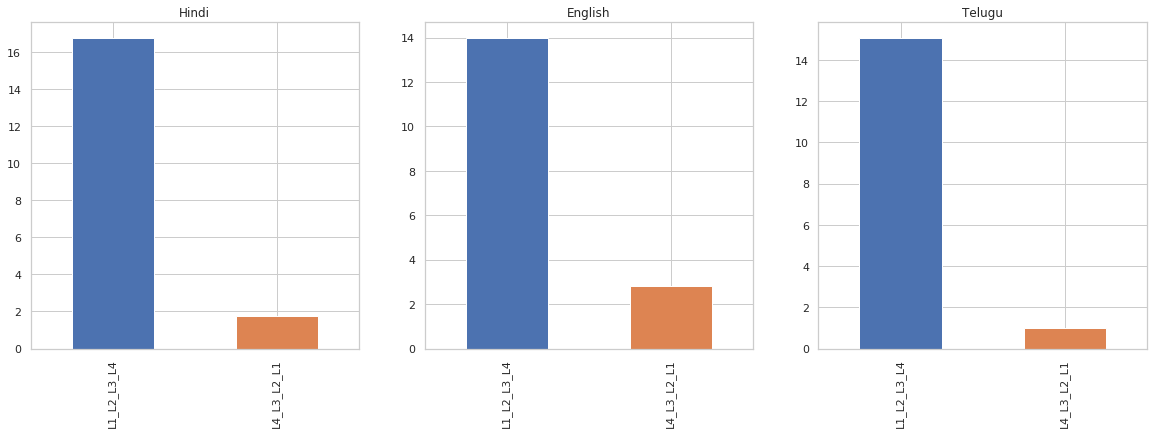

In [149]:
fig, ax =plt.subplots(1,3,figsize=(20,6))
sns.set(style="whitegrid")
ax[0].title.set_text('Hindi')
usage_pos_ngrams(hindi).plot('bar',ax=ax[0])

ax[1].title.set_text('English')
usage_pos_ngrams(english).plot('bar',ax=ax[1])

ax[2].title.set_text('Telugu')
usage_pos_ngrams(telugu).plot('bar',ax=ax[2])

In hindi 112 Ngrams like NN PSP NN CC NN NN , NN NN PSP NST VM , RP NN VM VAUX VM etc are decreasing from L4 to L1.


In [163]:
a=usage_pos_ngrams(hindi,raw=True)
a[a['order']=='L4_L3_L2_L1'].shape[0]

112

In english 301 Ngrams like CC NN VBD RB VB , CC PRP VBD JJ NNS , VBD VBG DT NN IN  etc are decreasing from L4 to L1.


In [155]:
a=usage_pos_ngrams(english,raw=True)
a[a['order']=='L4_L3_L2_L1'].shape[0]

301

In telugu 12 Ngrams like PRP VM NN NST VM , NN NST VM NN NST, PRP VM NN NST VM  etc are decreasing from L4 to L1.


In [164]:
a=usage_pos_ngrams(telugu,raw=True)
a[a['order']=='L4_L3_L2_L1'].shape[0]

12

Conclusion from POS Analysis:
    We can see that most pos tags, pos sentences and pos ngrams are used more often from L1 to L4, this tells us that as the level increases, sentences and phrases are formed in more variety of ways.                                     ` 

# Punctuations

In [ ]:
def count_pun_val(x,pun):
    count=0
    for i in x:
        if pun in i:
            count=count+1
    return count
def count_pun_vals(x,pun):
    count=0
    result = []
    [result.extend(el) for el in x]
    for i in result:
        if i in pun:
            count=count+1
    return count

# Sentences with commas

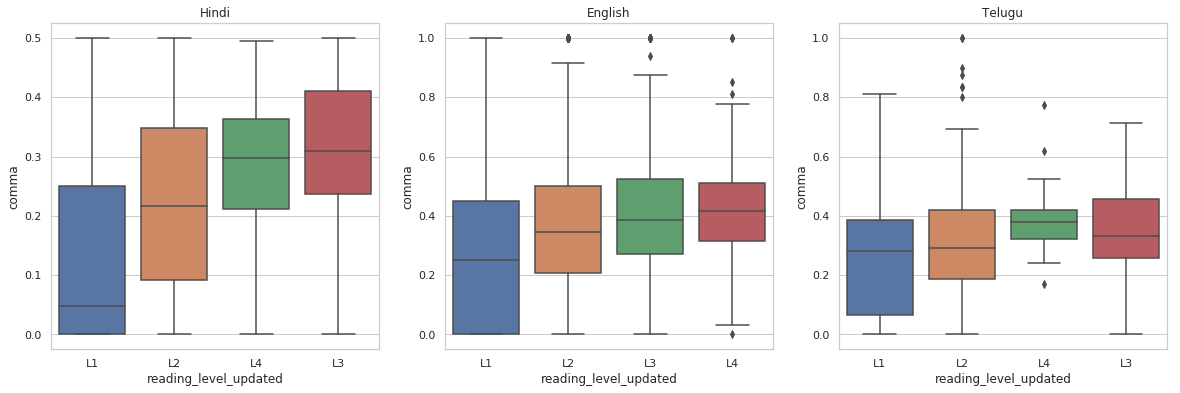

In [305]:
fig, ax =plt.subplots(1,3,figsize=(20,6))

hindi['comma']=hindi.tok.apply(lambda x: count_pun_val(x,','))/hindi.n_sentences
bins = 1
hist=False
border=0.5
sns.boxplot(x="reading_level_updated", y="comma", data=hindi[hindi.comma<=border],ax=ax[0])
ax[0].title.set_text('Hindi')

english['comma']=english.tok.apply(lambda x: count_pun_val(x,','))/english.n_sentences
bins = 1
hist=False
border=100
sns.boxplot(x="reading_level_updated", y="comma", data=english[english.comma<=border],ax=ax[1])
ax[1].title.set_text('English')


telugu['comma']=telugu.tok.apply(lambda x: count_pun_val(x,','))/telugu.n_sentences
bins = 1
hist=False
border=100
sns.boxplot(x="reading_level_updated", y="comma", data=telugu[telugu.comma<=border],ax=ax[2])
ax[2].title.set_text('Telugu')

# Questions

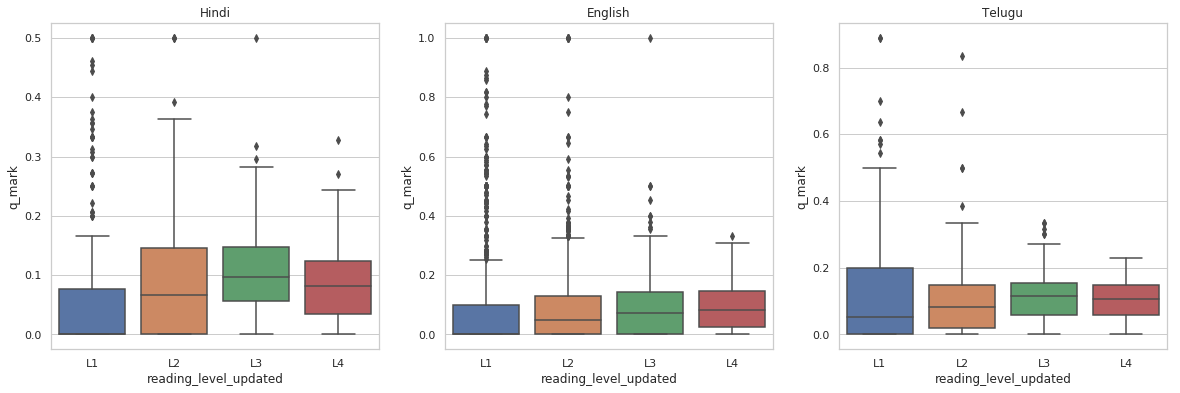

In [306]:
fig, ax =plt.subplots(1,3,figsize=(20,6))

hindi['q_mark']=hindi.tok.apply(lambda x: count_pun_val(x,'?'))/hindi.n_sentences
bins = 1
hist=False
border=0.5
sns.boxplot(x="reading_level_updated", y="q_mark", data=hindi[hindi.q_mark<=border],ax=ax[0])
ax[0].title.set_text('Hindi')

english['q_mark']=english.tok.apply(lambda x: count_pun_val(x,'?'))/english.n_sentences
bins = 1
hist=False
border=1
sns.boxplot(x="reading_level_updated", y="q_mark", data=english[english.q_mark<=border],ax=ax[1])
ax[1].title.set_text('English')



telugu['q_mark']=telugu.tok.apply(lambda x: count_pun_val(x,'?'))/telugu.n_sentences
bins = 1
hist=False
border=1
sns.boxplot(x="reading_level_updated", y="q_mark",order=['L1','L2','L3','L4'], data=telugu[telugu.q_mark<=border],ax=ax[2])
ax[2].title.set_text('Telugu')

# Direct Quotes

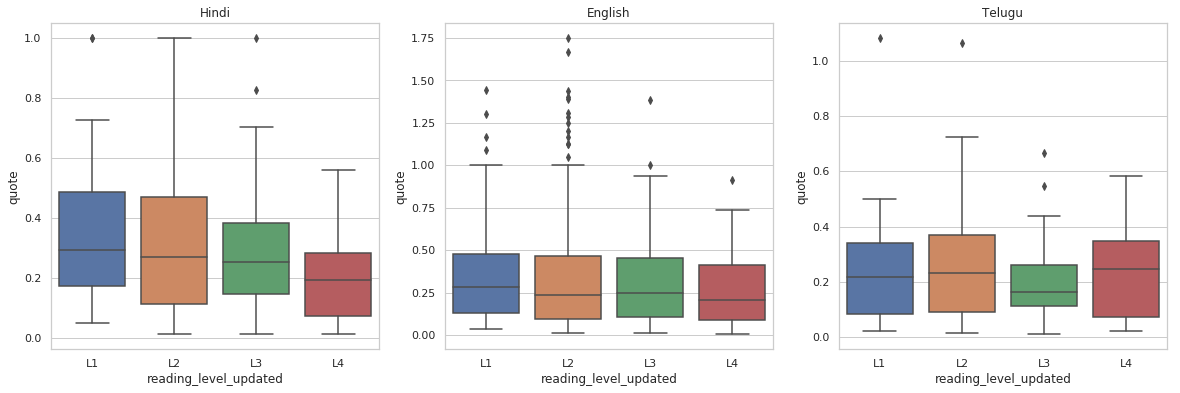

In [307]:
fig, ax =plt.subplots(1,3,figsize=(20,6))



hindi['quote']=hindi.tok.apply(lambda x: count_pun_vals(x,['"','“']))/hindi.n_sentences
bins = 1
hist=False
border=1
sns.boxplot(x="reading_level_updated", y="quote",  order=['L1','L2','L3','L4'],data=hindi[hindi.quote>0][hindi.quote<=border],ax=ax[0])
ax[0].title.set_text('Hindi')


english['quote']=english.tok.apply(lambda x: count_pun_vals(x,['"','“']))/english.n_sentences
bins = 1
hist=False
border=2
sns.boxplot(x="reading_level_updated", y="quote",  order=['L1','L2','L3','L4'],data=english[english.quote>0][english.quote<=border],ax=ax[1])
ax[1].title.set_text('English')


telugu['quote']=telugu.tok.apply(lambda x: count_pun_vals(x,['"','“']))/telugu.n_sentences
bins = 1
hist=False
border=1.5
sns.boxplot(x="reading_level_updated", y="quote",  order=['L1','L2','L3','L4'],data=telugu[telugu.quote>0][telugu.quote<=border],ax=ax[2])
ax[2].title.set_text('Telugu')


# Exclamatory Sentences

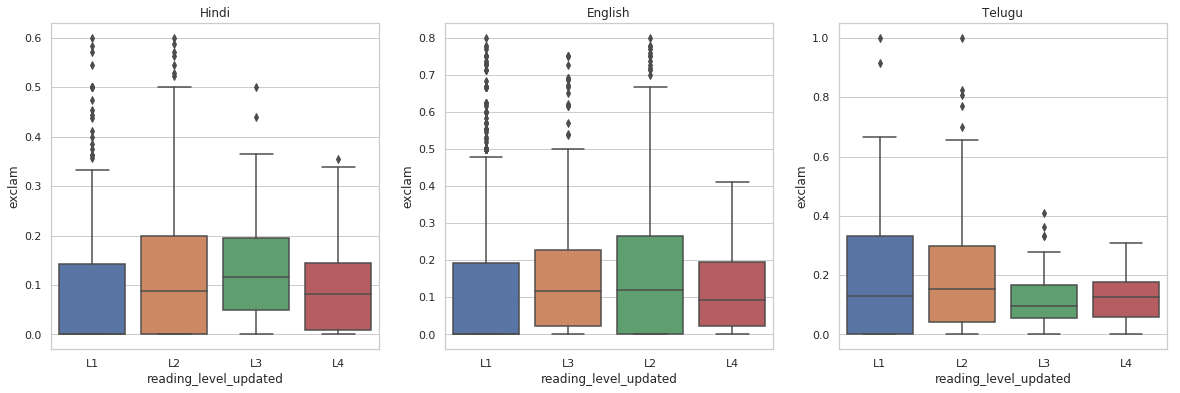

In [308]:
fig, ax =plt.subplots(1,3,figsize=(20,6))



hindi['exclam']=hindi.tok.apply(lambda x: count_pun_val(x,'!'))/hindi.n_sentences
bins = 1
hist=False
border=0.6
ax[0].title.set_text('Hindi')
sns.boxplot(x="reading_level_updated", y="exclam", data=hindi[hindi.exclam<=border],ax=ax[0])

english['exclam']=english.tok.apply(lambda x: count_pun_val(x,'!'))/english.n_sentences
bins = 1
hist=False
border=0.8
ax[1].title.set_text('English')
sns.boxplot(x="reading_level_updated", y="exclam", data=english[english.exclam<=border],ax=ax[1])

telugu['exclam']=telugu.tok.apply(lambda x: count_pun_val(x,'!'))/telugu.n_sentences
bins = 1
hist=False
border=2
ax[2].title.set_text('Telugu')
sns.boxplot(x="reading_level_updated", y="exclam", order=['L1','L2','L3','L4'], data=telugu[telugu.exclam<=border],ax=ax[2])
